In [1]:
%matplotlib inline

In [2]:
import numpy as np
import librosa
from librosa_ours import librosa as lib_ours
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [3]:
### define file names
fileOne = "audio_data/Chopin_Mazurka_Op30_No2_1_mono.wav"
fileTwo = "audio_data/Chopin_Mazurka_Op30_No2_2_mono.wav"

In [4]:
### read in the two wav files
freqOne, audioOne = wavfile.read(fileOne)
freqTwo, audioTwo = wavfile.read(fileTwo)
audioOne = audioOne.astype(float)
audioTwo = audioTwo.astype(float)

/Users/cstrong/anaconda/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [5]:
### generate chroma features from the audio data
hopLength = 4096 # 4096 * (1/44100 s/sample) = 9.3ms
nFFT = 32768 # 32768 * (1/44100 s/sample) = 74 ms
featuresOne = librosa.feature.chroma_stft(y = audioOne, sr = freqOne, hop_length = hopLength)
featuresTwo = librosa.feature.chroma_stft(y = audioTwo, sr = freqTwo, hop_length = hopLength)

In [6]:
### normalize the chroma features by their L2 norm in each column
featuresOne = librosa.util.normalize(featuresOne, norm=2, axis=0)
featuresTwo = librosa.util.normalize(featuresTwo, norm=2, axis=0)

In [7]:
###  setup DTW parameter
stepSizes = np.array([[1,1], [1, 2], [2, 1]])
weights = np.array([2, 3, 3])

In [8]:
### Run normal DTW
accumCostNormal, warpingPathNormal = lib_ours.sequence.dtw(featuresOne, featuresTwo, metric='cosine', step_sizes_sigma = stepSizes, weights_mul = weights, forward_update=False)

In [9]:
### Run our look-forward DTW
accumCostForward, warpingPathForward = lib_ours.sequence.dtw(featuresOne, featuresTwo, metric='cosine', step_sizes_sigma = stepSizes, weights_mul = weights, forward_update=True)

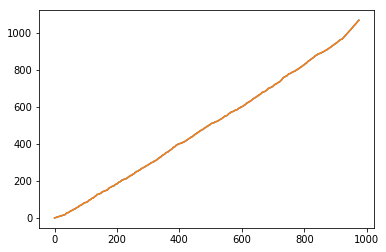

In [10]:
### Visualize both paths
plt.figure(0)
plt.plot([x for x, y in warpingPathNormal], [y for x, y in warpingPathNormal])
plt.plot([x for x, y in warpingPathForward], [y for x, y in warpingPathForward])